Herliana Nur Ekawati

NIM 11201038

Grup M07

Sumber dataset: https://www.kaggle.com/datasets/gregorut/videogamesales

Impor library pandas dan ubah dataset menjadi dataframe. Kemudian munculkan kolom hanya Name, Genre, dan Publisher sebagai atribut untuk dilatih

In [ ]:
import pandas as pd
df = pd.read_csv('vgsales.csv')
df = df[['Name', 'Genre', 'Publisher']]

Untuk menampilkan sampel

In [ ]:
df

,Name,Genre,Publisher
0,Wii Sports,Sports,Nintendo
1,Super Mario Bros.,Platform,Nintendo
2,Mario Kart Wii,Racing,Nintendo
3,Wii Sports Resort,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Platform,Kemco
16594,Men in Black II: Alien Escape,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,Racing,Activision
16596,Know How 2,Puzzle,7G//AMES


Melakukan proses one-hot-encoding

In [ ]:
category = pd.get_dummies(df.Genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Genre')
df_baru

,Name,Publisher,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Nintendo,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,Nintendo,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,Nintendo,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Nintendo,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,Nintendo,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Kemco,0,0,0,0,1,0,0,0,0,0,0,0
16594,Men in Black II: Alien Escape,Infogrames,0,0,0,0,0,0,0,0,1,0,0,0
16595,SCORE International Baja 1000: The Official Game,Activision,0,0,0,0,0,0,1,0,0,0,0,0
16596,Know How 2,7G//AMES,0,0,0,0,0,1,0,0,0,0,0,0


Mengubah nilai-nilai dataframe ke dalam tipe data numpy array

In [ ]:
name = df_baru['Name'].values
label = df_baru[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']].values

Bagi data untuk training dan untuk testing dengan data validasi 20%

In [ ]:
from sklearn.model_selection import train_test_split
name_latih, name_test, label_latih, label_test = train_test_split(name, label, test_size=0.2)

Mengubah setiap kata pada dataset ke dalam bilangan numerik dengan Fungsi Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(name_latih)
tokenizer.fit_on_texts(name_test)

sekuens_latih = tokenizer.texts_to_sequences(name_latih)
sekuens_test = tokenizer.texts_to_sequences(name_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

Embedding, LSTM

In [ ]:
from tensorflow.python import metrics
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print("Training dihentikan karena akurasi telah mencapai 97%")
      self.model.stop_training = True

callbacks = myCallback()

Melatih model

In [ ]:
num_epochs = 25
history = model.fit(padded_latih, 
                    label_latih, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/25
415/415 - 14s - loss: 1.8720 - accuracy: 0.3872 - val_loss: 1.3510 - val_accuracy: 0.5657 - 14s/epoch - 34ms/step
Epoch 2/25
415/415 - 11s - loss: 0.9544 - accuracy: 0.7116 - val_loss: 1.0023 - val_accuracy: 0.7078 - 11s/epoch - 27ms/step
Epoch 3/25
415/415 - 11s - loss: 0.6150 - accuracy: 0.8124 - val_loss: 0.9493 - val_accuracy: 0.7355 - 11s/epoch - 26ms/step
Epoch 4/25
415/415 - 11s - loss: 0.4666 - accuracy: 0.8560 - val_loss: 1.0052 - val_accuracy: 0.7383 - 11s/epoch - 26ms/step
Epoch 5/25
415/415 - 11s - loss: 0.3699 - accuracy: 0.8822 - val_loss: 1.0166 - val_accuracy: 0.7431 - 11s/epoch - 26ms/step
Epoch 6/25
415/415 - 12s - loss: 0.3061 - accuracy: 0.9007 - val_loss: 1.0406 - val_accuracy: 0.7551 - 12s/epoch - 29ms/step
Epoch 7/25
415/415 - 11s - loss: 0.2600 - accuracy: 0.9144 - val_loss: 1.2029 - val_accuracy: 0.7419 - 11s/epoch - 27ms/step
Epoch 8/25
415/415 - 11s - loss: 0.2202 - accuracy: 0.9257 - val_loss: 1.2321 - val_accuracy: 0.7539 - 11s/epoch - 26ms/step


Plot loss dan akurasi pada saat training dan validation

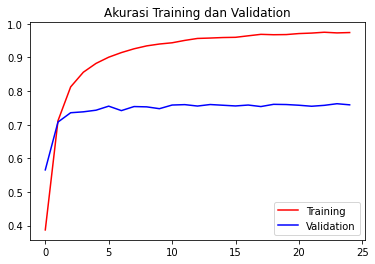

<Figure size 432x288 with 0 Axes>

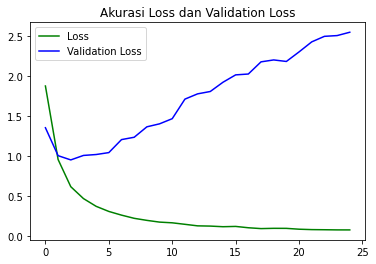

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Akurasi Training dan Validation')
plt.plot(epochs, acc, 'r', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs = range(len(loss))

plt.title('Akurasi Loss dan Validation Loss')
plt.plot(epochs, loss, 'g', label='Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()